In [1]:
from collections import defaultdict

def parse_data (f_name, num):
    summoner_champions = defaultdict(list)    # key is summoner_id, val is the list of champions this user played
                                              # champions representation is (champion_id, champion_level, champion_points)
    summoner_rank = defaultdict(int)          # key is summoner_id, val is the rank
    champions_summoner = defaultdict(list)    # key is champion_id, val is the list of user_id who played this champion
    
    # skip = 0
    index = 0
    with open (f_name) as f:
        for line in f:
            if index >= num: break
            
            data = line.strip().split('-')
            if len(data) != 3:
                # skip += 1
                summoner = data[-3].split(',')[-1]
                champ_list = data[-2]
                rank = data[-1]
#                 for d in data:
#                     print(d)
#                 continue
            #summoner = 's_' + data[0]
            else:
                summoner = data[0]
                champ_list = data[1]
                rank = data[2]
            
            # process champ_list to get the list of tuples
            champ_list = champ_list.split(',')
            for i in range(len(champ_list)):
                champ_list[i] = champ_list[i].replace('(', '').replace(')', '')
            temp = []
            c_list = []
            for i in range(len(champ_list)):
                if champ_list[i] == '': continue
                    
                if i%3 == 0:
                    #temp.append('c_' + champ_list[i])
                    temp.append(champ_list[i])
                else:
                    temp.append(int(champ_list[i]))
                    
                if i%3 == 2:
                    c_list.append(tuple(temp))
                    temp = []
                i += 1
            
            summoner_champions[summoner] = c_list
            summoner_rank[summoner] = int(rank)
            for champ, l, p in c_list:
                champions_summoner[champ].append(summoner)
            
            index += 1
    #print(skip, 'lines were skipped.')        
    return summoner_champions, summoner_rank, champions_summoner

In [ ]:
summoner_champions, summoner_rank, champions_summoner = parse_data('DataCrawling/playersInfo.txt', 2)
print(summoner_champions, '\n')
print(summoner_rank, '\n')
print(champions_summoner, '\n')

In [2]:
summoner_champions, summoner_rank, champions_summoner = parse_data('DataCrawling/playersInfo.txt', 60000)

In [ ]:
import matplotlib

print('There are', len(summoner_champions), 'summoners.')
print('There are', len(champions_summoner), 'champions.')

# Find top 50 most popular champions
champions_count = defaultdict(int)
for user, champ_list in summoner_champions.items():
    for champ, l, p in champ_list:
        champions_count[champ] += 1
        
popular_champs = [(champions_count[x], x) for x in champions_count]
popular_champs.sort()
popular_champs.reverse()
print(popular_champs[:50])

In [7]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

x_plot = [champ for count, champ in popular_champs]
y_plot = [count for count, champ in popular_champs]
 
y_pos = np.arange(len(x_plot))

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, ax = plt.subplots(figsize=(50,15))
plt.bar(y_pos, y_plot, align='center', alpha=0.5, width=0.4)
plt.xticks(y_pos, x_plot,rotation=90, fontsize=20)
plt.xlabel('Champion IDs', fontsize=30)
plt.ylabel('Number of Summoners',fontsize=30)
plt.title('Popularity of Champions',fontsize=40)
plt.grid(True)
 
plt.show()

NameError: name 'popular_champs' is not defined

In [ ]:
popular_champs[-1]

In [ ]:
popular_champs[-1]

In [ ]:
actual_champions_count = defaultdict(int)
for user, champ_list in summoner_champions.items():
    for champ, l, p in champ_list:
        if l >= 3:
            actual_champions_count[champ] += 1
actual_popular_champs = [(actual_champions_count[x], x) for x in actual_champions_count]
actual_popular_champs.sort()
actual_popular_champs.reverse()
print(actual_popular_champs[:50])

In [ ]:
%matplotlib inline

x_plot = [champ for count, champ in actual_popular_champs]
y_plot = [count for count, champ in actual_popular_champs]
 
y_pos = np.arange(len(x_plot))

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, ax = plt.subplots(figsize=(50,15))
plt.bar(y_pos, y_plot, align='center', alpha=0.5, width=0.4)
plt.xticks(y_pos, x_plot,rotation=90, fontsize=20)
plt.xlabel('Champion IDs', fontsize=30)
plt.ylabel('Number of Summoners',fontsize=30)
plt.title('Popularity of Champions',fontsize=40)
plt.grid(True)
 
plt.show()

In [ ]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.plot(y_pos, y_plot)
plt.xlabel('Champion (from most popular to least popular)')
plt.ylabel('Number of Summoners')
plt.title('Slope of Change in Popularity')
plt.show()

In [ ]:
rank_count = defaultdict(int)
for summoner, rank in summoner_rank.items():
    rank_count[rank] += 1

In [ ]:
# Data to plot
labels = 'No rank', 'Rank 1', 'Rank 2', 'Rank 3'
sizes = [rank_count[x] for x in range(4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [3]:
import json
def parse_champion_info():
    champ_type = {}
    champ_info = {}
    with open('DataCrawling/championInfo.json', 'r') as f:
        d = json.load(f)

    #i = 0
    for champ, champ_dict in d['data'].items():
        #if i > 3: break
        #print(champ_dict)
        champ_id = champ_dict['key']
        champ_tags = champ_dict['tags']
        champ_information = champ_dict['info']
        
        champ_type[champ_id] = champ_tags
        champ_info[champ_id] = champ_information
        #i += 1
        
    return champ_type, champ_info

In [4]:
champ_type, champ_info = parse_champion_info()

In [28]:
mage = []
support = []
fighter = []
tank = []
marksman = []
assassin = []
i = 0
for summoner, champ_list in summoner_champions.items():
    if i > 10: break
    temp = [(p, l, champ) for champ, l, p in champ_list]
    temp.sort()
    temp.reverse()
    type_count = defaultdict(int)
    for p, l, c in temp:
        tags = champ_type[c]
        for t in tags:
            type_count[t] += 1
            
    total = sum(list(type_count.values()))       
    for ty in type_count:
        type_count[ty] /= total
    mage.append(type_count['Mage'])
    support.append(type_count['Support'])
    fighter.append(type_count['Fighter'])
    tank.append(type_count['Tank'])
    marksman.append(type_count['Marksman'])
    assassin.append(type_count['Assassin'])
    #print(type_count)
    i+=1
     

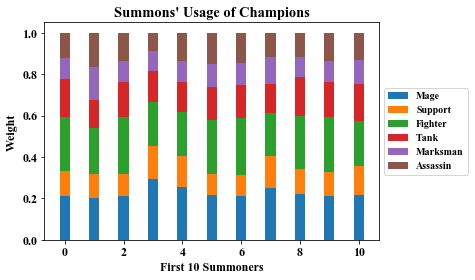

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

N = len(mage)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, mage, width)
p2 = plt.bar(ind, support, width, bottom=mage)
p3 = plt.bar(ind, fighter, width, bottom=np.array(mage)+ np.array(support))
p4 = plt.bar(ind, tank, width, bottom=np.array(fighter) + np.array(mage)+ np.array(support))
p5 = plt.bar(ind, marksman, width, bottom=np.array(tank) + np.array(fighter) + np.array(mage)+ np.array(support))
p6 = plt.bar(ind, assassin, width, bottom=np.array(marksman) + np.array(tank) + np.array(fighter) + np.array(mage)+ np.array(support))

plt.ylabel('Weight')
plt.xlabel('First 10 Summoners')
plt.title('Summons\' Usage of Champions')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Mage', 'Support', 'Fighter', 'Tank', 'Marksman', 'Assassin'), prop=fontP,loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [27]:
j = 4
mage[j] + support[j] + fighter[j] + tank[j] + marksman[j] + assassin[j]

1.0